In [1]:
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from chespex.molecules import Molecule
import networkx as nx
color_palette = [plt.cm.viridis(p) for p in np.linspace(0, 1, 4)]

In [2]:
client = MongoClient("mongodb://localhost:27017")
database = client.get_database(f"molecules-4")
collection = database.get_collection(f"level-0")
molecules = list(collection.find())
latent_space = np.array([molecule["latent_space_test"] for molecule in molecules])

C SP SQ+ TQ-,0-2 1-2 1-3
C P SQ+ TQ-,0-2 1-2 1-3
C SP TQ+ TQ-,0-2 1-2 1-3
SC SP SQ+ TQ-,0-2 1-2 1-3
P SC SQ+ TQ-,0-2 0-3 1-2


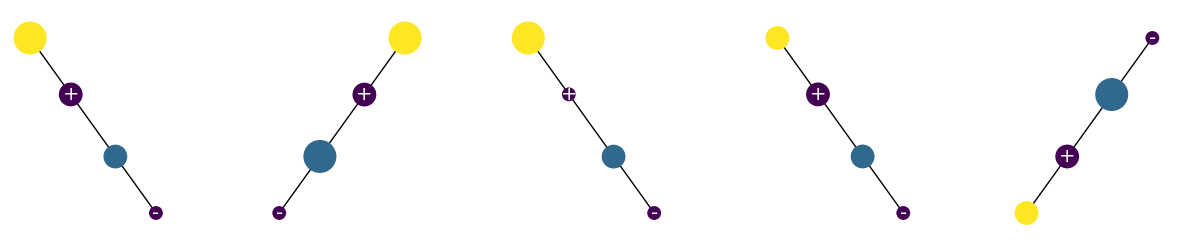

In [3]:
target_index = np.random.choice(len(molecules))
target_molecule = molecules[target_index]
neighbors = cdist([target_molecule["latent_space_test"]], latent_space).argsort()[0][:5]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(15, 3))
for idx, molecule_index in enumerate(neighbors):
    db_molecule = molecules[molecule_index]
    print(db_molecule['name'])
    molecule = Molecule.reconstruct(
        db_molecule['bead_names'], db_molecule['node_features'],
        db_molecule['edge_index'], attribute_names=['size', 'class', 'charge', 'ocowddg']
    )
    graph = molecule.as_networkx()
    node_colors = [color_palette[int(graph.nodes[node]["class"])] for node in graph.nodes]
    text_colors = ['black' if graph.nodes[node]["class"] < 2 else 'white' for node in graph.nodes]
    node_size = [(3 - graph.nodes[node]['size'])**1.7 * 80 for node in graph.nodes]
    labels = {node: ['-','','+'][int(graph.nodes[node]['charge'])] for node in graph.nodes}
    nx.draw_spring(graph, with_labels=True, ax=axs[idx], node_size=node_size,
    labels=labels, font_size=14, node_color=node_colors, font_color='white')
    axs[idx].margins(0.1)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()